In [1]:
import pandas as pd
import numpy as np
# 데이터를 수집합니다.
train1 = pd.read_csv("C:/Users/User/Desktop/0513/train1.csv")
# 수집된 데이터 샘플을 확인합니다.
train1.head()

index  gender  car  reality  child_num  income_total           income_type  \
0      1       2    0        1          0      202500.0  Commercial associate   
1      2       1    0        1          0      270000.0  Commercial associate   
2      3       2    1        1          1      157500.0  Commercial associate   
3      4       1    1        1          2      157500.0               Working   
4      5       2    0        0          0      157500.0  Commercial associate   

                        edu_type     family_type         house_type  \
0  Secondary / secondary special         Married  House / apartment   
1  Secondary / secondary special         Married  House / apartment   
2  Secondary / secondary special         Married  House / apartment   
3  Secondary / secondary special         Married       With parents   
4  Secondary / secondary special  Civil marriage  House / apartment   

        ...          occyp_type  family_size  begin_month  begin_month_num  \
0       ...         Sales staff            2          -37               37   
1       ...             Drivers            2          -53               53   
2       ...         Accountants            3          -60               60   
3       ...             Drivers            4          -60               60   
4       ...            Laborers            2          -22               22   

   card_using  credit ages  employed_year  employed_year_5yr_bound  \
0           3       0   40              6                        2   
1           4       0   40             15                        3   
2           5       0   30              6                        2   
3           5       0   30             12                        3   
4           2       0   40              4                        1   

   income_quintile  
0                2  
1                1  
2                2  
3                2  
4                2  

[5 rows x 26 columns]

In [2]:
# 현재 데이터에서 신용등급의 개수를 확인한다
train1.credit.value_counts()

2    2000
1    2000
0    2000
Name: credit, dtype: int64

In [3]:
train1.car.value_counts()

0    3760
1    2240
Name: car, dtype: int64

In [4]:
train1.reality.value_counts()

1    4030
0    1970
Name: reality, dtype: int64

Text(0.5,1,'reality and car in 2d plane')

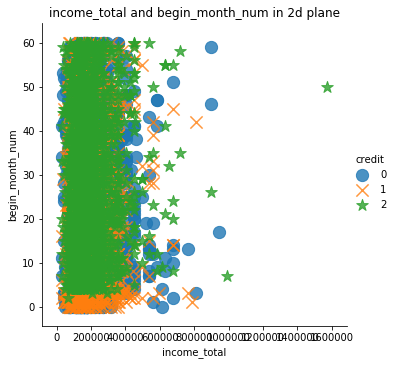

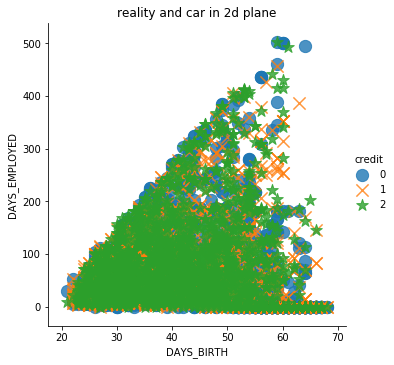

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.lmplot('income_total', 'begin_month_num', data=train1, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x", "*"],
          hue="credit") # 예측값
# 타이틀
plt.title('income_total and begin_month_num in 2d plane')


sns.lmplot('DAYS_BIRTH', 'DAYS_EMPLOYED', data=train1, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x", "*"],
          hue="credit") # 예측값
# 타이틀
plt.title('reality and car in 2d plane')

#이산형 변수라 소용이 없음.

In [6]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다.
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train1, test1 = train_test_split(train1, test_size=0.1)

In [7]:
train1.shape[0]

5400

In [8]:
test1.shape[0]

600

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train1.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 60):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']] #여기에 분별력이 있는 컬럼들을 써줘야 한다.
y_train = train1[['credit']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                                            scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.42518136258218125,
 0.3755469887885892,
 0.35833697919762403,
 0.3709245145822697,
 0.3646223572788233,
 0.35759041927985596,
 0.3694467870367749,
 0.3690764191926159,
 0.3703734039096227,
 0.3707472049171707,
 0.36908944319467996,
 0.36575745119520336,
 0.36408771136432383,
 0.36131366219714683,
 0.3618705933028966,
 0.35707322707197015,
 0.35837433082577425,
 0.355594813653067,
 0.35244905906203977,
 0.34837427755036743,
 0.3450371547875438,
 0.34541404032725576,
 0.34726590232613463,
 0.34708002873429944,
 0.34856186013120255,
 0.3500334224087168,
 0.35022580230706296,
 0.3483698212713868,
 0.34911159146433834,
 0.34986089487573974,
 0.35151798591021144,
 0.35466375948297496,
 0.35039934915928433,
 0.3496627021369854,
 0.34780776319863727,
 0.346696295849546,
 0.34244043047085504,
 0.3422480543688561,
 0.346501502107055,
 0.34668430635211533,
 0.3430011281858298,
 0.34020416110285606,
 0.3437189269766147,
 0.3453838884717195,
 0.3475999606394714]

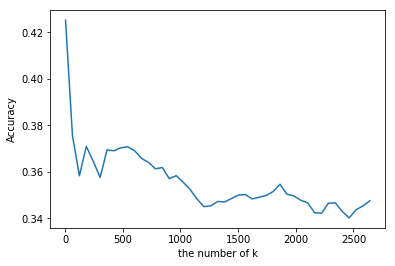

In [10]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [11]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
# 선수 포지션을 예측할 값으로 지정
y_train = train1[['credit']]

# knn 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_test = test1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]

# 선수 포지션에 대한 정답을 지정
y_test = test1[['credit']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.4483333333333333


In [13]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

prediction  ground_truth
0             1             1
1             1             2
2             0             1
3             2             1
4             1             1
5             0             0
6             1             0
7             2             0
8             2             0
9             2             2
10            0             2
11            1             0
12            2             2
13            1             0
14            2             0
15            0             2
16            2             1
17            0             0
18            0             2
19            1             2
20            1             1
21            1             0
22            0             0
23            0             2
24            0             1
25            1             1
26            1             0
27            1             0
28            2             1
29            0             0
..          ...           ...
570           0             0
571           0             2
572           1             0
573           1             1
574           0             2
575           0             2
576           0             0
577           1             1
578           1             2
579           2             1
580           0             1
581           2             0
582           2             1
583           2             2
584           1             1
585           2             2
586           2             1
587           0             2
588           1             1
589           1             1
590           1             2
591           0             0
592           0             0
593           1             2
594           2             0
595           1             2
596           0             2
597           0             0
598           2             2
599           0             0

[600 rows x 2 columns]

#서포트 벡터 머신

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np


def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                        {'kernel' : ['rbf'],
                         'gamma': [0.01, 0.1, 1],
                         'C': [10, 100, 1000]}
                     ]
    # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

x_train = train1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]

y_train = train1[['credit']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [16]:
# 시각화할 비용 후보들을 저장
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

# 3점슛과 블로킹 횟수로 학습
x = train1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용     
y = train1['credit'].tolist()

# 시각화를 위해 신용등급(0,1,2)를 숫자료 표현
position = []
for gt in y:
    if gt == 0:
        position.append(0)
    elif gt == 1:
        position.append(1)
    else:
        position.append(2)

classifiers = []

# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((C, gamma, clf))
        
# 각 모델을 시각화
plt.figure(figsize=(18, 18))
xx, yy, = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
             size='medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x['income_total'], x['DAYS_EMPLOYED'], x['DAYS_BIRTH'], c=position, cmap=plt.cm.RdBu_r,
               edgecolors='k')

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

<Figure size 1296x1296 with 0 Axes>

In [17]:
x_test = test1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y_test = test1[['credit']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(x_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)) )

             precision    recall  f1-score   support

          0       0.44      0.42      0.43       208
          1       0.40      0.45      0.43       196
          2       0.37      0.34      0.35       196

avg / total       0.40      0.41      0.40       600


accuracy : 0.405


In [18]:
comparison = pd.DataFrame({'prediction':y_pred,
                          'ground_truth':y_true.values.ravel()})
comparison

prediction  ground_truth
0             1             1
1             1             2
2             2             1
3             2             1
4             1             1
5             1             0
6             1             0
7             2             0
8             2             0
9             1             2
10            1             2
11            0             0
12            2             2
13            1             0
14            0             0
15            0             2
16            1             1
17            0             0
18            2             2
19            2             2
20            1             1
21            1             0
22            1             0
23            0             2
24            1             1
25            2             1
26            0             0
27            1             0
28            2             1
29            1             0
..          ...           ...
570           1             0
571           2             2
572           1             0
573           1             1
574           0             2
575           0             2
576           0             0
577           1             1
578           2             2
579           0             1
580           2             1
581           2             0
582           2             1
583           1             2
584           1             1
585           2             2
586           2             1
587           2             2
588           2             1
589           2             1
590           1             2
591           1             0
592           0             0
593           1             2
594           2             0
595           1             2
596           2             2
597           1             0
598           2             2
599           0             0

[600 rows x 2 columns]

#의사결정나무

In [21]:
train1_DT = pd.DataFrame(train1)
train1_DT = train1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'credit']]
test1_DT = pd.DataFrame(test1)
test1_DT = test1[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'credit']]

In [22]:
train1_DT.credit.value_counts()

2    1804
1    1804
0    1792
Name: credit, dtype: int64

In [23]:
test1_DT.credit.value_counts()

0    208
2    196
1    196
Name: credit, dtype: int64

In [24]:
train1_DT.head()

income_total  DAYS_EMPLOYED  DAYS_BIRTH  credit
4674      157500.0            124          36       2
4204      270000.0            411          53       2
521       720000.0            160          56       2
1628      360000.0            349          52       0
1830      225000.0             22          33       0

Text(0.5,1,'district visualization in 2d plane')

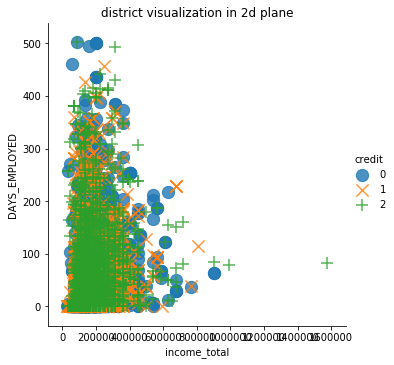

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('income_total', 'DAYS_EMPLOYED', data=train1_DT, fit_reg=False,
          scatter_kws={"s":150},
          markers=["o", "x", "+"],
          hue="credit")
# title
plt.title('district visualization in 2d plane')

In [28]:
X_train = train1_DT[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y_train = train1_DT[['credit']]

X_test = test1_DT[['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y_test = test1_DT[['credit']]

In [29]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
def display_decision_surface(clf, X, y):
    x_min = X.DAYS_EMPLOYED.min() - 0.01
    x_max = X.DAYS_EMPLOYED.max() + 0.01
    y_min = X.income_total.min() - 0.01
    y_max = X.income_total.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].DAYS_EMPLOYED, X.loc[idx].income_total,
                   c=color, label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    
    plt.title("Decision surface of a decision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1),
              loc=2, borderaxespad=0., fontsize=14)
    
    plt.xlabel('DAYS_EMPLOYED', fontsize=16)
    plt.ylabel('income_total', fontsize=16)
    plt.rcParams["figure.figsize"] = [7, 5]
    plt.rcParams["font.size"] = 14
    plt.rcParams["xtick.labelsize"] = 14
    plt.rcParams["ytick.labelsize"] = 14
    plt.show()

In [37]:
display_decision_surface(clf, X_train, y_encoded)

MemoryError: 

In [41]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("credit")
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = ['income_total', 'DAYS_EMPLOYED', 'DAYS_BIRTH'],
                               class_names=['0', '1', '2'],
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [42]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [43]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 0.4533333333333333


In [44]:
comparison = pd.DataFrame({'prediction':le.classes_[pred],
                           'ground_truth':y_test.values.ravel()})
comparison

prediction  ground_truth
0             1             1
1             1             2
2             2             1
3             1             1
4             1             1
5             0             0
6             1             0
7             1             0
8             2             0
9             1             2
10            2             2
11            2             0
12            2             2
13            0             0
14            2             0
15            0             2
16            1             1
17            1             0
18            0             2
19            2             2
20            1             1
21            1             0
22            0             0
23            0             2
24            1             1
25            2             1
26            0             0
27            1             0
28            2             1
29            0             0
..          ...           ...
570           0             0
571           0             2
572           1             0
573           1             1
574           0             2
575           1             2
576           0             0
577           1             1
578           2             2
579           2             1
580           2             1
581           0             0
582           2             1
583           1             2
584           1             1
585           0             2
586           0             1
587           2             2
588           2             1
589           1             1
590           1             2
591           2             0
592           0             0
593           1             2
594           2             0
595           1             2
596           2             2
597           0             0
598           2             2
599           2             0

[600 rows x 2 columns]